# TP1: SERIES TEMPORELLES

Realised by RUDY TCHAMBA TCHAPTCHE ITIEL 21T2981

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
passengers = pd.read_csv("/home/redeus/Downloads/trafic_aerien/AirPassengers.csv", index_col='Month', parse_dates=True)

In [3]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
passengers.shape

(144, 1)

### QUESTION 1

Puisque les analyse de font suivant la colunne Passengers on a

In [6]:
# la moyenne
np.mean(passengers['#Passengers'])

280.2986111111111

In [7]:
# la variance
np.std(passengers['#Passengers'])**2

14291.97333140432

In [8]:
# l'ecartype
np.std(passengers['#Passengers'])

119.54904153277148

In [9]:
passengers.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### QUESTION 2

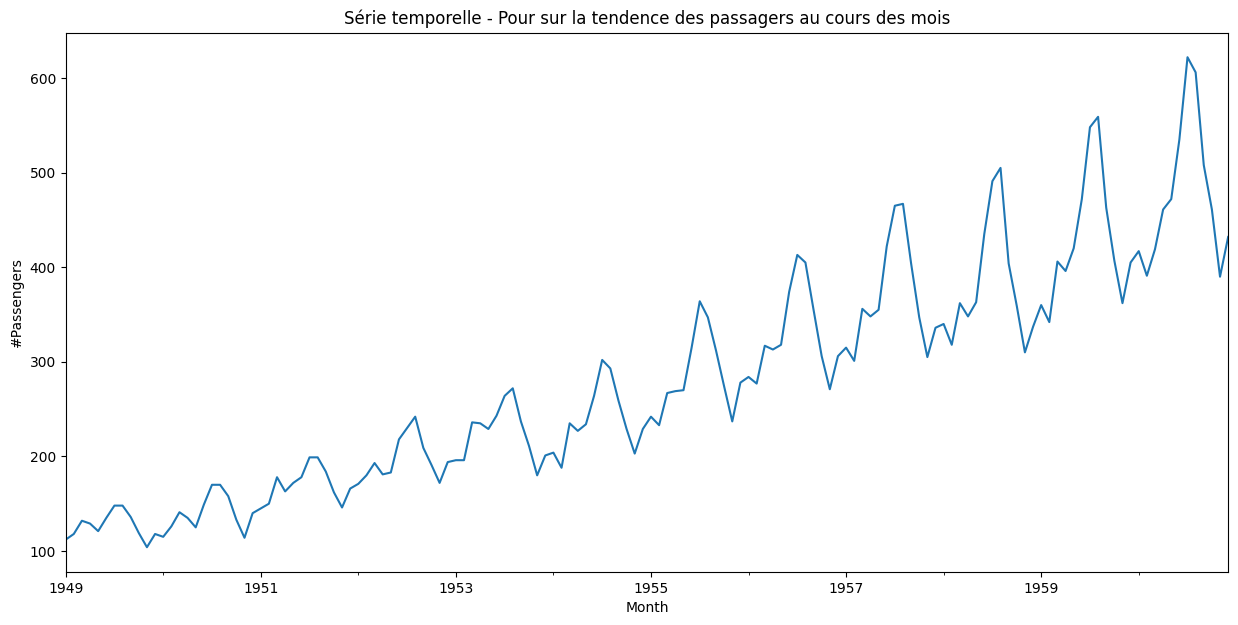

In [10]:
passengers['#Passengers'].plot(figsize=(15, 7))
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.title('Série temporelle - Pour sur la tendence des passagers au cours des mois')
plt.show()

### QUESTION 3

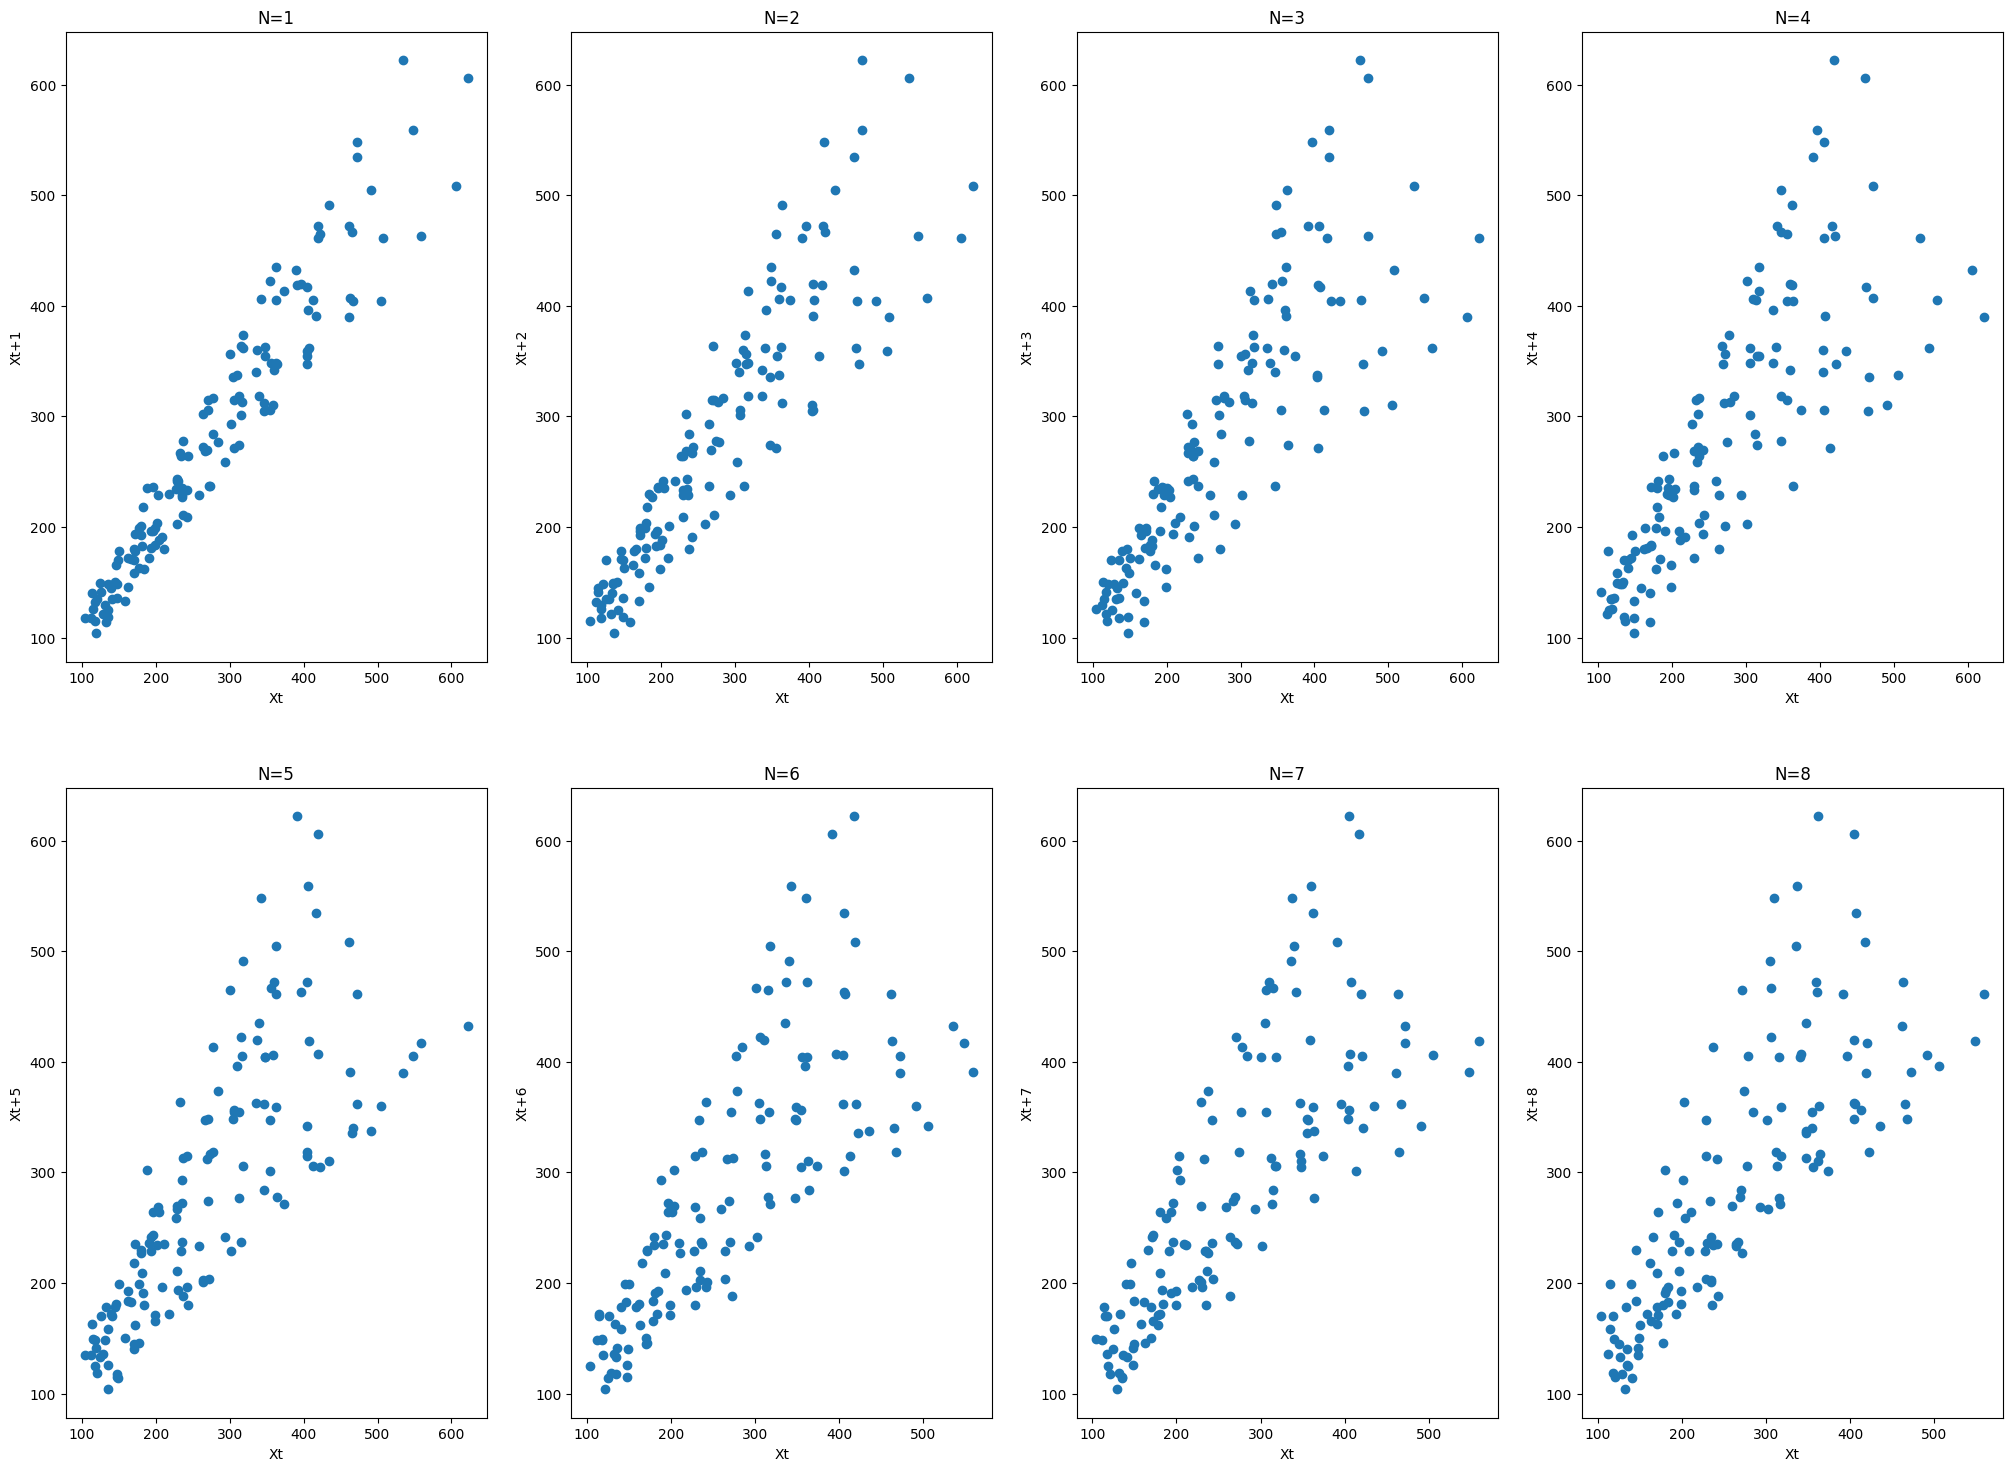

In [11]:
# REPRESENTATION DU NUAGE DE POINTS
plt.figure(figsize=[25,18])
for N in range(1,9):
    plt.subplot(2,4,N)
    debut=0
    fin=144
    plt.scatter(passengers['#Passengers'][debut:fin-N], passengers['#Passengers'][debut+N:fin])
    plt.xlabel("Xt")
    plt.ylabel(f"Xt+{N}")
    plt.title(f"N={N}")
plt.show()

### QUESTION 4

In [12]:
#CALCUL DE L'AUTO-CONVARIANCE-EMPIRIQUE
def auto_cov(data, K, moy):
    debut=0
    fin=len(data)
    Xt=data[debut:fin-K]
    Xt_k=data[debut+K:fin]

    cov=0
    for i in range(fin-K):
        cov+=(Xt[i]-moy)*(Xt_k[i]-moy)
    return cov/(fin-K)

In [13]:
def auto_cor(data, K):
    moy=np.mean(data)
    cov_0=auto_cov(data, 0, moy)
    cov_K=auto_cov(data, K, moy)
    return cov_K/cov_0

In [14]:
from tqdm import tqdm
auto_cor_all=list()
data=list(passengers['#Passengers'])
for i in tqdm(range(1, 51)):
    auto_cor_all.append(auto_cor(data, i))

100%|██████████| 50/50 [00:00<00:00, 2475.25it/s]


<BarContainer object of 50 artists>

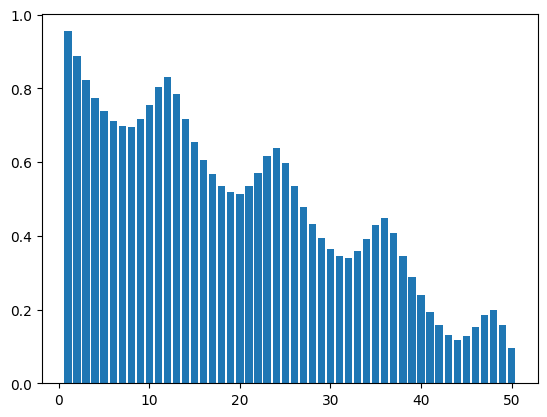

In [15]:
indexes=[i for i in range(1,51)]
plt.bar(indexes,auto_cor_all)

### QUESTION 5

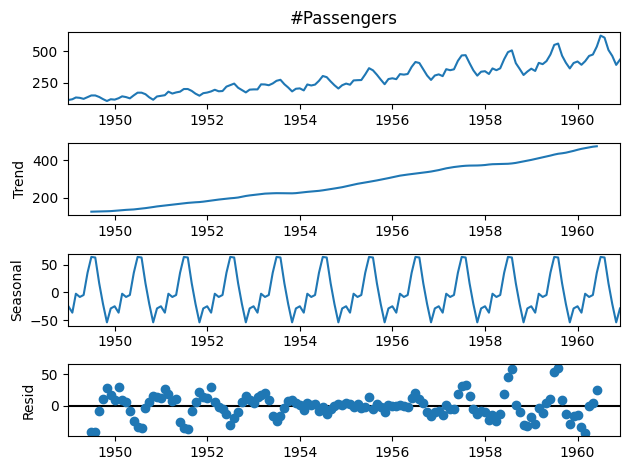

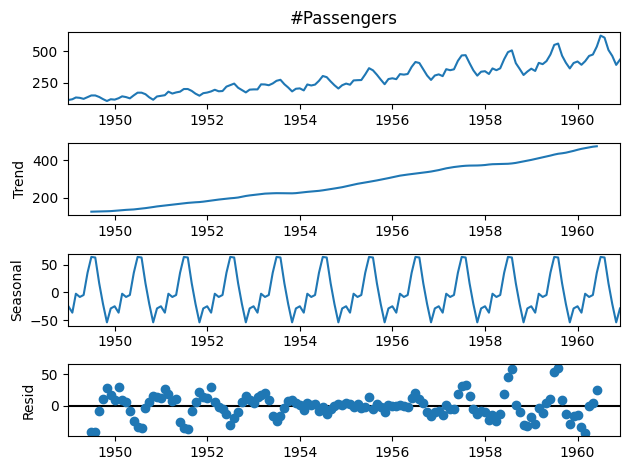

In [16]:
import statsmodels.api as sm

tsb = sm.tsa.seasonal_decompose(passengers['#Passengers'])
tsb.plot()